<a href="https://colab.research.google.com/github/sathyajain12/PhD-implementations/blob/main/Higher_Dimensional_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from scipy.special import gamma

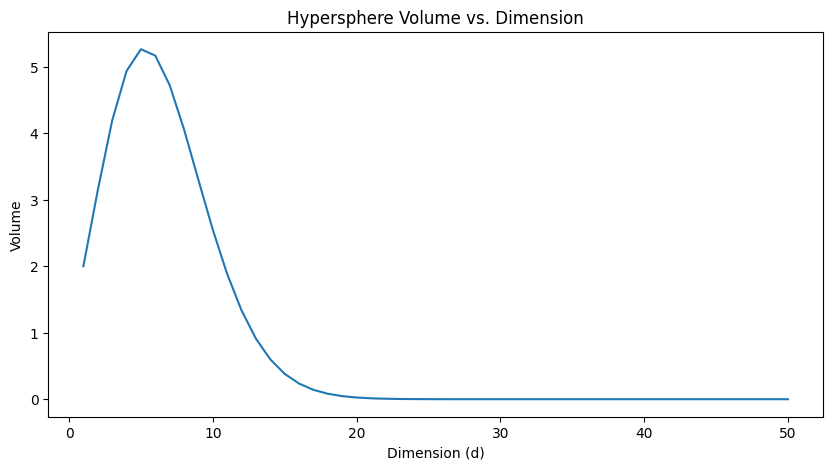

In [ ]:
# Task 1: Hypersphere Volume
dimensions = np.arange(1, 51)
volume = (np.pi ** (dimensions / 2)) / gamma(dimensions / 2 + 1) #formula for hypersphere volume
plt.figure(figsize=(10, 5))
plt.plot(dimensions, volume)
plt.xlabel('Dimension (d)')
plt.ylabel('Volume')
plt.title('Hypersphere Volume vs. Dimension')
plt.show()

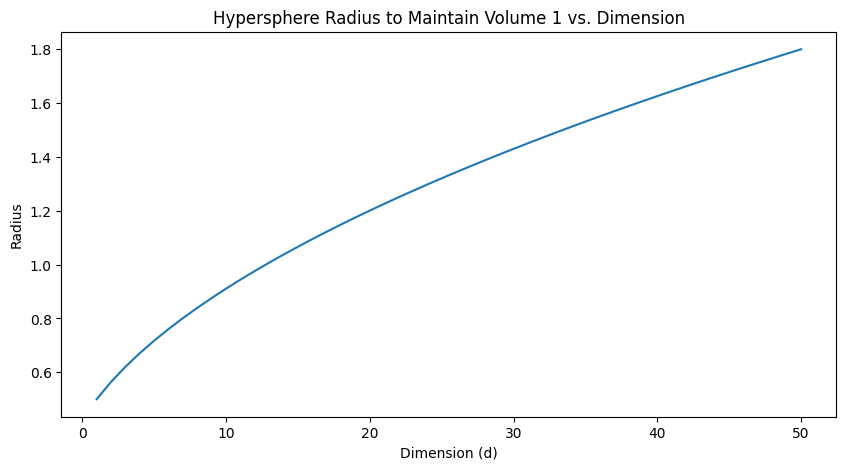

In [ ]:
# Task 2: Hypersphere Radius
radius = (1 / volume) ** (1 / dimensions) #calculates the radius for each dimension (d) from 1 to 100
plt.figure(figsize=(10, 5))
plt.plot(dimensions, radius)
plt.xlabel('Dimension (d)')
plt.ylabel('Radius')
plt.title('Hypersphere Radius to Maintain Volume 1 vs. Dimension')
plt.show()

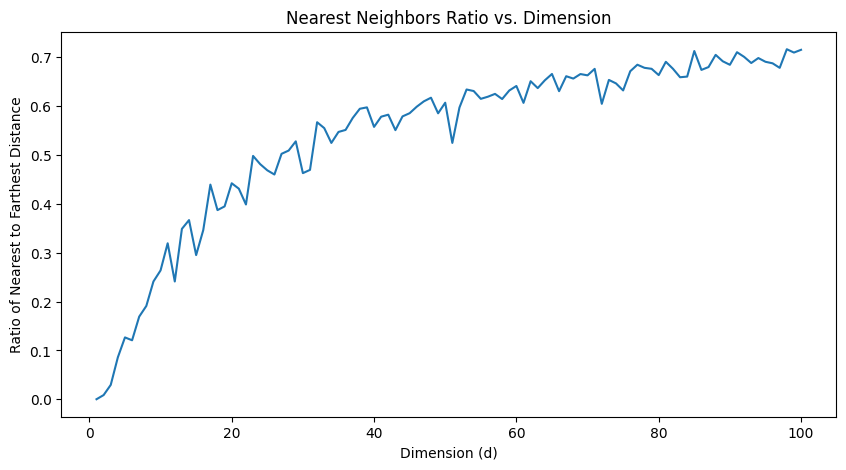

In [ ]:
# Task 3: Nearest and Farthest Neighbors
dimensions = np.arange(1, 101)
n = 10000

def compute_nearest_and_farthest_ratios(dim):
    center = np.ones(dim) * 0.5
    points = np.random.rand(n, dim)
    nearest_distances = np.min(cdist(points, [center]), axis=0)
    farthest_distances = np.max(cdist(points, [center]), axis=0)
    ratio = nearest_distances / farthest_distances
    return ratio

ratios = [compute_nearest_and_farthest_ratios(dim) for dim in dimensions]
plt.figure(figsize=(10, 5))
plt.plot(dimensions, ratios)
plt.xlabel('Dimension (d)')
plt.ylabel('Ratio of Nearest to Farthest Distance')
plt.title('Nearest Neighbors Ratio vs. Dimension')
plt.show()

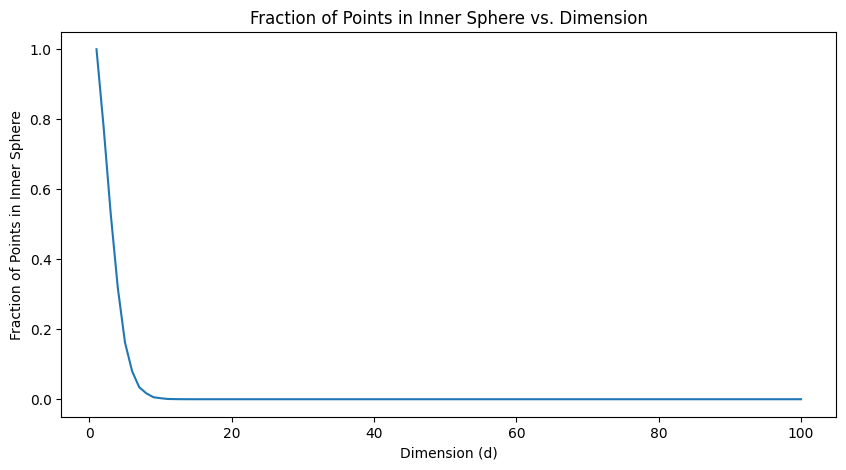

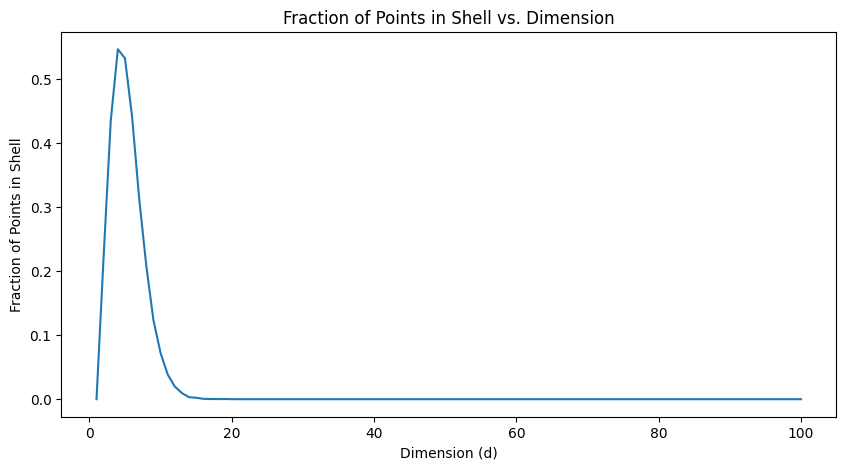

In [ ]:
# Task 4: Fraction of Volume
l = 2
n = 10000
inner_sphere_radius = l / 2
outer_sphere_radius = l / np.sqrt(2)
epsilon = 0.01

def compute_fraction_of_volume(dim):
    points = np.random.rand(n, dim) * l - l/2
    distances = np.linalg.norm(points, axis=1)
    inside_inner_sphere = np.sum(distances <= inner_sphere_radius)
    inside_outer_sphere = np.sum(distances <= outer_sphere_radius)
    inner_fraction = inside_inner_sphere / n
    shell_fraction_value = (inside_outer_sphere - inside_inner_sphere) / n
    return inner_fraction, shell_fraction_value

dimensions = np.arange(1, 101)
inner_sphere_fraction = []
shell_fraction = []

for dim in dimensions:
    inner_fraction, shell_fraction_value = compute_fraction_of_volume(dim)
    inner_sphere_fraction.append(inner_fraction)
    shell_fraction.append(shell_fraction_value)

plt.figure(figsize=(10, 5))
plt.plot(dimensions, inner_sphere_fraction)
plt.xlabel('Dimension (d)')
plt.ylabel('Fraction of Points in Inner Sphere')
plt.title('Fraction of Points in Inner Sphere vs. Dimension')
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(dimensions, shell_fraction)
plt.xlabel('Dimension (d)')
plt.ylabel('Fraction of Points in Shell')
plt.title('Fraction of Points in Shell vs. Dimension')
plt.show()
